## Linear Regression to predict EV prices

In [324]:
#Basics
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")

#Visualizations 
import seaborn as sns
import matplotlib.pyplot as plt

#Linear Regression 
import statsmodels.api as stats
import warnings

#Split into train/test
from sklearn.model_selection import train_test_split

#Scaling 
from sklearn.preprocessing import StandardScaler

In [203]:
cars_df = pd.read_csv("C:/Users/Bolaji/Downloads/ML Portfolio/Regression/ElectricCarData_Norm.csv")
cars_df.head()

,Brand,Model,Accel,TopSpeed,Range,Efficiency,FastCharge,RapidCharge,PowerTrain,PlugType,BodyStyle,Segment,Seats,PriceEuro
0,Tesla,Model 3 Long Range Dual Motor,4.6 sec,233 km/h,450 km,161 Wh/km,940 km/h,Rapid charging possible,All Wheel Drive,Type 2 CCS,Sedan,D,5,55480
1,Volkswagen,ID.3 Pure,10.0 sec,160 km/h,270 km,167 Wh/km,250 km/h,Rapid charging possible,Rear Wheel Drive,Type 2 CCS,Hatchback,C,5,30000
2,Polestar,2,4.7 sec,210 km/h,400 km,181 Wh/km,620 km/h,Rapid charging possible,All Wheel Drive,Type 2 CCS,Liftback,D,5,56440
3,BMW,iX3,6.8 sec,180 km/h,360 km,206 Wh/km,560 km/h,Rapid charging possible,Rear Wheel Drive,Type 2 CCS,SUV,D,5,68040
4,Honda,e,9.5 sec,145 km/h,170 km,168 Wh/km,190 km/h,Rapid charging possible,Rear Wheel Drive,Type 2 CCS,Hatchback,B,4,32997


In [204]:
cars_df.shape

(103, 14)

In [205]:
cars_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103 entries, 0 to 102
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Brand        103 non-null    object
 1   Model        103 non-null    object
 2   Accel        103 non-null    object
 3   TopSpeed     103 non-null    object
 4   Range        103 non-null    object
 5   Efficiency   103 non-null    object
 6   FastCharge   103 non-null    object
 7   RapidCharge  103 non-null    object
 8   PowerTrain   103 non-null    object
 9   PlugType     103 non-null    object
 10  BodyStyle    103 non-null    object
 11  Segment      103 non-null    object
 12  Seats        103 non-null    int64 
 13  PriceEuro    103 non-null    int64 
dtypes: int64(2), object(12)
memory usage: 11.4+ KB


In [206]:
cars_df['Accel'] = cars_df['Accel'].str.split(' ', 1).str[0]
cars_df['TopSpeed'] = cars_df['TopSpeed'].str.split(' ', 1).str[0]
cars_df['Range'] = cars_df['Range'].str.split(' ', 1).str[0]
cars_df['Efficiency'] = cars_df['Efficiency'].str.split(' ', 1).str[0]
cars_df['FastCharge'] = cars_df['FastCharge'].str.split(' ', 1).str[0]

In [207]:
cars_df.isnull().sum()

Brand          0
Model          0
Accel          0
TopSpeed       0
Range          0
Efficiency     0
FastCharge     0
RapidCharge    0
PowerTrain     0
PlugType       0
BodyStyle      0
Segment        0
Seats          0
PriceEuro      0
dtype: int64

In [208]:
cars_df['Accel'] = cars_df['Accel'].astype(float)
cars_df['TopSpeed'] = cars_df['TopSpeed'].astype(int)
cars_df['Range'] = cars_df['Range'].astype(int)
cars_df['Efficiency'] = cars_df['Efficiency'].astype(int)

In [209]:
cars_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103 entries, 0 to 102
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Brand        103 non-null    object 
 1   Model        103 non-null    object 
 2   Accel        103 non-null    float64
 3   TopSpeed     103 non-null    int32  
 4   Range        103 non-null    int32  
 5   Efficiency   103 non-null    int32  
 6   FastCharge   103 non-null    object 
 7   RapidCharge  103 non-null    object 
 8   PowerTrain   103 non-null    object 
 9   PlugType     103 non-null    object 
 10  BodyStyle    103 non-null    object 
 11  Segment      103 non-null    object 
 12  Seats        103 non-null    int64  
 13  PriceEuro    103 non-null    int64  
dtypes: float64(1), int32(3), int64(2), object(8)
memory usage: 10.2+ KB


In [210]:
cars_df['FastCharge'] = cars_df['FastCharge'].str.replace(r'\D', '')
cars_df['FastCharge'] = pd.to_numeric(cars_df['FastCharge'])

In [212]:
cars_df[cars_df['FastCharge'].isnull()]

,Brand,Model,Accel,TopSpeed,Range,Efficiency,FastCharge,RapidCharge,PowerTrain,PlugType,BodyStyle,Segment,Seats,PriceEuro
57,Renault,Twingo ZE,12.6,135,130,164,NaN,Rapid charging not possible,Rear Wheel Drive,Type 2,Hatchback,A,4,24790
68,Renault,Kangoo Maxi ZE 33,22.4,130,160,194,NaN,Rapid charging not possible,Front Wheel Drive,Type 2,SPV,N,5,38000
77,Smart,EQ forfour,12.7,130,95,176,NaN,Rapid charging not possible,Rear Wheel Drive,Type 2,Hatchback,A,4,22030
82,Smart,EQ fortwo coupe,11.6,130,100,167,NaN,Rapid charging not possible,Rear Wheel Drive,Type 2,Hatchback,A,2,21387
91,Smart,EQ fortwo cabrio,11.9,130,95,176,NaN,Rapid charging not possible,Rear Wheel Drive,Type 2,Cabrio,A,2,24565


In [213]:
brand_avg = cars_df.groupby('Brand')['FastCharge'].mean()
cars_df['FastCharge'] = cars_df.apply(lambda row: brand_avg[row['Brand']] if pd.isnull(row['FastCharge']) else row['FastCharge'], axis=1)

In [215]:
cars_df['FastCharge'].fillna(0, inplace=True)

In [216]:
cars_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103 entries, 0 to 102
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Brand        103 non-null    object 
 1   Model        103 non-null    object 
 2   Accel        103 non-null    float64
 3   TopSpeed     103 non-null    int32  
 4   Range        103 non-null    int32  
 5   Efficiency   103 non-null    int32  
 6   FastCharge   103 non-null    float64
 7   RapidCharge  103 non-null    object 
 8   PowerTrain   103 non-null    object 
 9   PlugType     103 non-null    object 
 10  BodyStyle    103 non-null    object 
 11  Segment      103 non-null    object 
 12  Seats        103 non-null    int64  
 13  PriceEuro    103 non-null    int64  
dtypes: float64(2), int32(3), int64(2), object(7)
memory usage: 10.2+ KB


In [221]:
cars_df.select_dtypes(include='object').nunique()

Brand           33
Model          102
RapidCharge      2
PowerTrain       3
PlugType         4
BodyStyle        9
Segment          8
dtype: int64

In [222]:
cars_df = cars_df.drop(columns=['Model'])

In [223]:
cars_df.describe()

,Accel,TopSpeed,Range,Efficiency,FastCharge,Seats,PriceEuro
count,103.000000,103.000000,103.000000,103.000000,103.000000,103.000000,103.000000
mean,7.396117,179.194175,338.786408,189.165049,439.029126,4.883495,55811.563107
std,3.017430,43.573030,126.014444,29.566839,212.950858,0.795834,34134.665280
min,2.100000,123.000000,95.000000,104.000000,0.000000,2.000000,20129.000000
25%,5.100000,150.000000,250.000000,168.000000,260.000000,5.000000,34429.500000
50%,7.300000,160.000000,340.000000,180.000000,440.000000,5.000000,45000.000000
75%,9.000000,200.000000,400.000000,203.000000,555.000000,5.000000,65000.000000
max,22.400000,410.000000,970.000000,273.000000,940.000000,7.000000,215000.000000


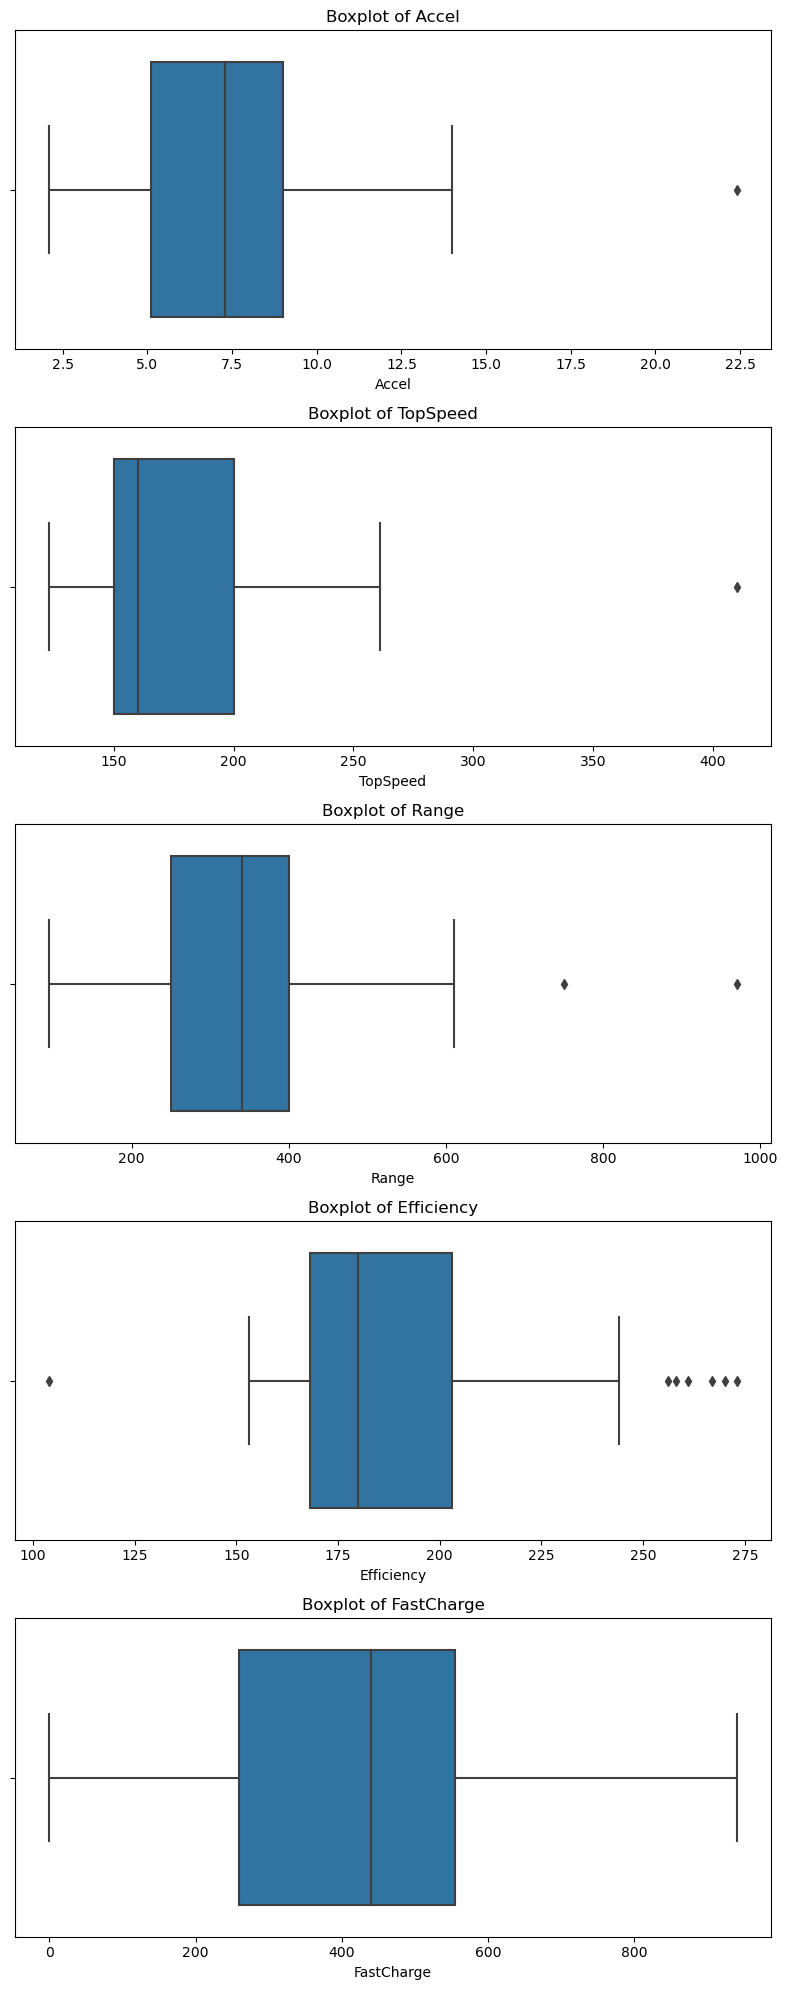

In [273]:
columns = ['Accel', 'TopSpeed', 'Range', 'Efficiency', 'FastCharge']

# Set up the plot
fig, axs = plt.subplots(len(columns), figsize=(8, len(columns) * 4))

# Create countplots for each column
for i, column in enumerate(columns):
    ax = axs[i]
    ax = sns.boxplot(data=cars_df, x=column, ax=ax)
    ax.set_title(f'Boxplot of {column}')
    
# Adjust spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()

In [246]:
cars_df.loc[cars_df['PriceEuro'] > 115000]

,Brand,Accel,TopSpeed,Range,Efficiency,FastCharge,RapidCharge,PowerTrain,PlugType,BodyStyle,Segment,Seats,PriceEuro
16,Porsche,2.8,260,375,223,780.0,Rapid charging possible,All Wheel Drive,Type 2 CCS,Sedan,F,4,180781
23,Audi,3.5,240,425,197,850.0,Rapid charging possible,All Wheel Drive,Type 2 CCS,Sedan,F,4,125000
48,Lightyear,10.0,150,575,104,540.0,Rapid charging possible,All Wheel Drive,Type 2 CCS,Liftback,F,5,149000
51,Tesla,2.1,410,970,206,920.0,Rapid charging possible,All Wheel Drive,Type 2 CCS,Cabrio,S,4,215000
72,Porsche,3.5,250,385,217,770.0,Rapid charging possible,All Wheel Drive,Type 2 CCS,Station,F,4,150000
79,Porsche,3.2,260,390,215,810.0,Rapid charging possible,All Wheel Drive,Type 2 CCS,Sedan,F,4,148301


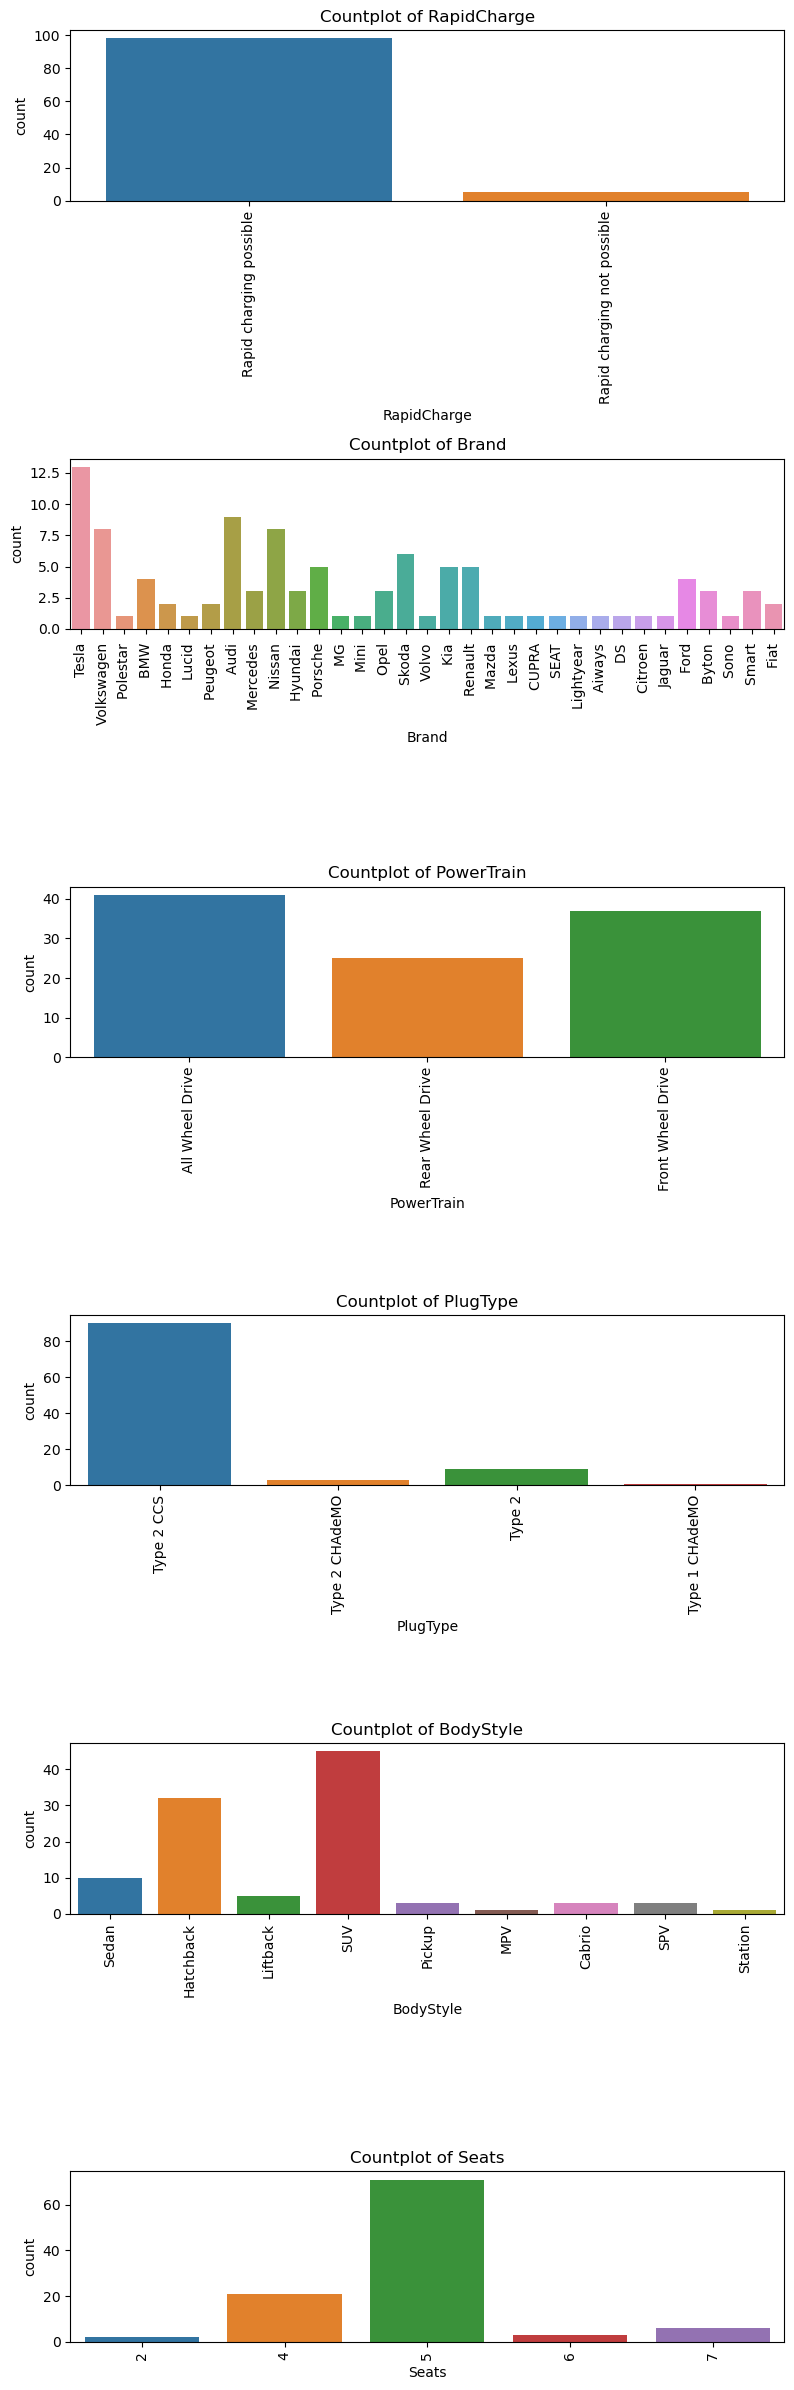

In [272]:
columns = ['RapidCharge', 'Brand', 'PowerTrain', 'PlugType', 'BodyStyle', 'Seats']

# Set up the plot
fig, axs = plt.subplots(len(columns), figsize=(8, len(columns) * 4))

# Create countplots for each column
for i, column in enumerate(columns):
    ax = axs[i]
    ax = sns.countplot(data=cars_df, x=column, ax=ax)
    ax.set_title(f'Countplot of {column}')
    ax.tick_params(axis='x', rotation=90)
    
# Adjust spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()


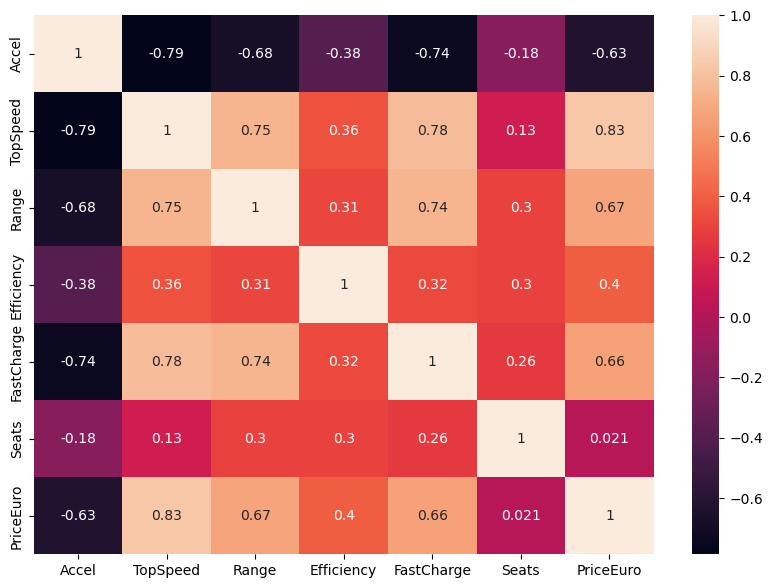

In [276]:
plt.rcParams['figure.figsize']=(10,7)
heatmap = sns.heatmap(cars_df.corr(), annot=True)

In [297]:
def create_bar_chart(cars_df, x_variable, y_variable, title):
    # Compute the average values for the specified variables
    average_values = cars_df.groupby(x_variable)[y_variable].mean()

    # Sort the values based on the y_variable in descending order
    sorted_values = average_values.sort_values(ascending=False)

    # Plot the bar chart
    plt.figure(figsize=(10, 6))
    plt.bar(sorted_values.index, sorted_values.values)
    plt.xlabel(x_variable)
    plt.ylabel(y_variable)
    plt.title(title)

    # Rotate the x-axis labels if needed
    plt.xticks(rotation=90)

    # Display the plot
    plt.show()

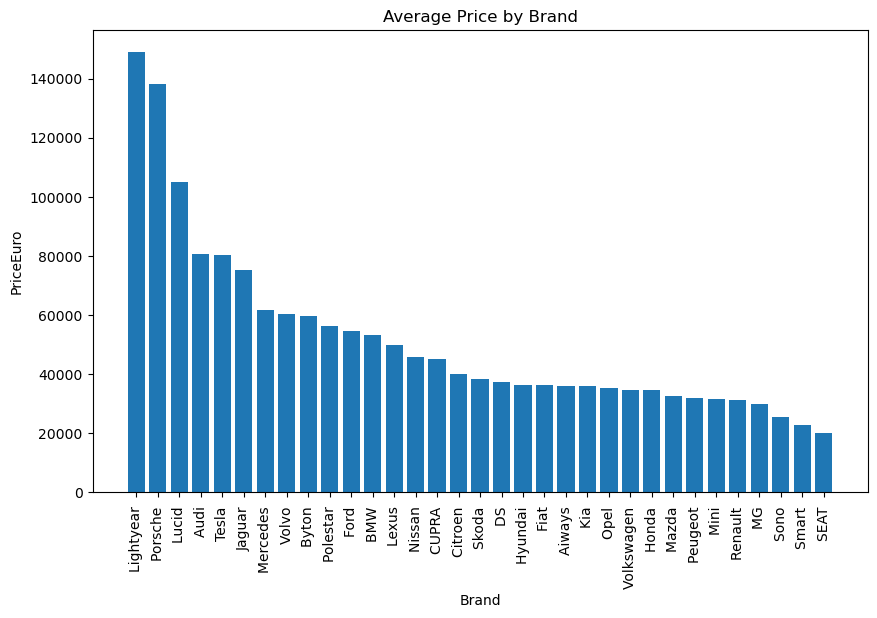

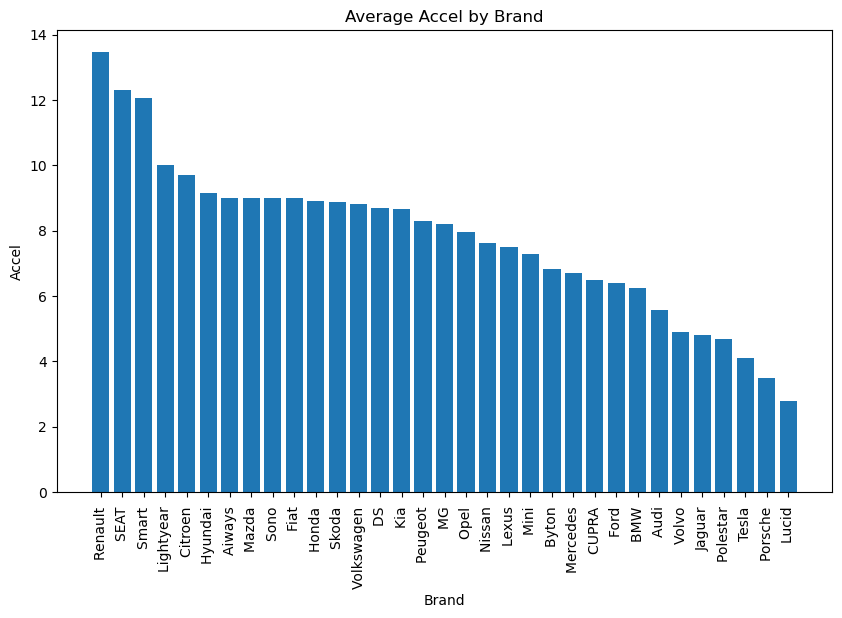

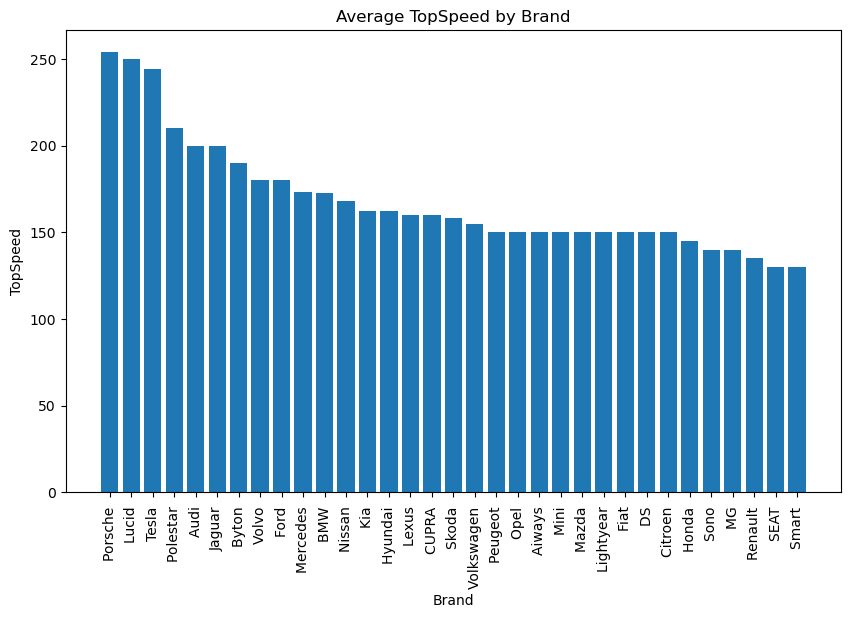

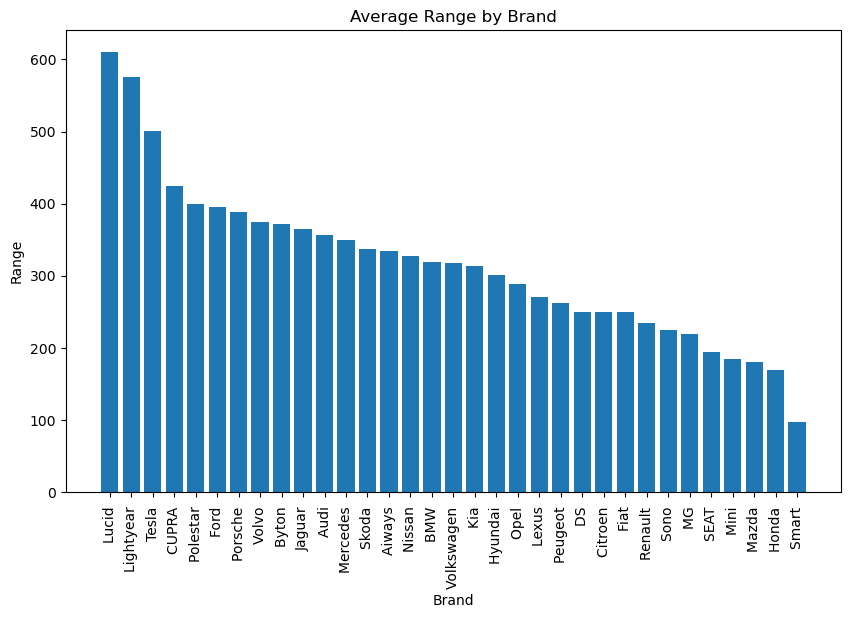

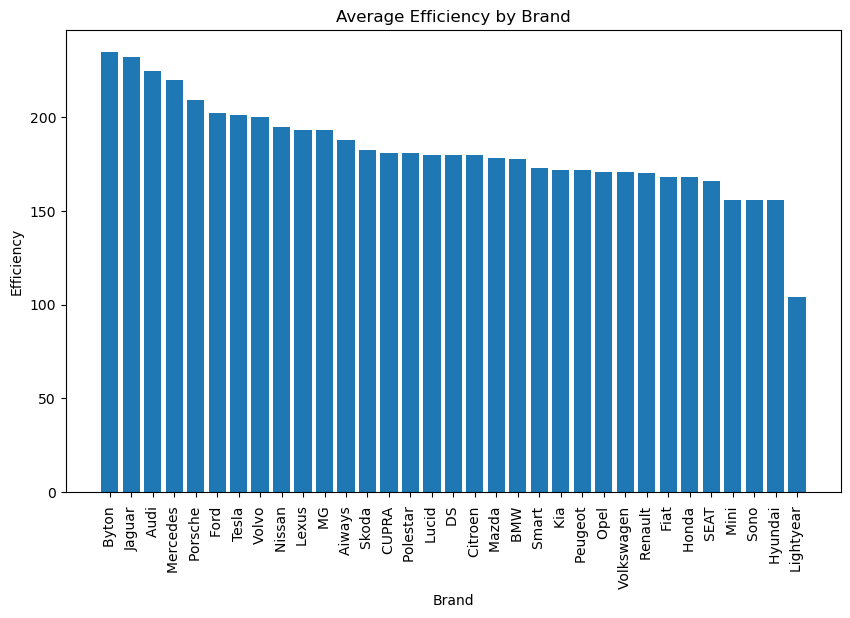

In [300]:
create_bar_chart(cars_df, 'Brand', 'PriceEuro', 'Average Price by Brand')
create_bar_chart(cars_df, 'Brand', 'Accel', 'Average Accel by Brand')
create_bar_chart(cars_df, 'Brand', 'TopSpeed', 'Average TopSpeed by Brand')
create_bar_chart(cars_df, 'Brand', 'Range', 'Average Range by Brand')
create_bar_chart(cars_df, 'Brand', 'Efficiency', 'Average Efficiency by Brand')

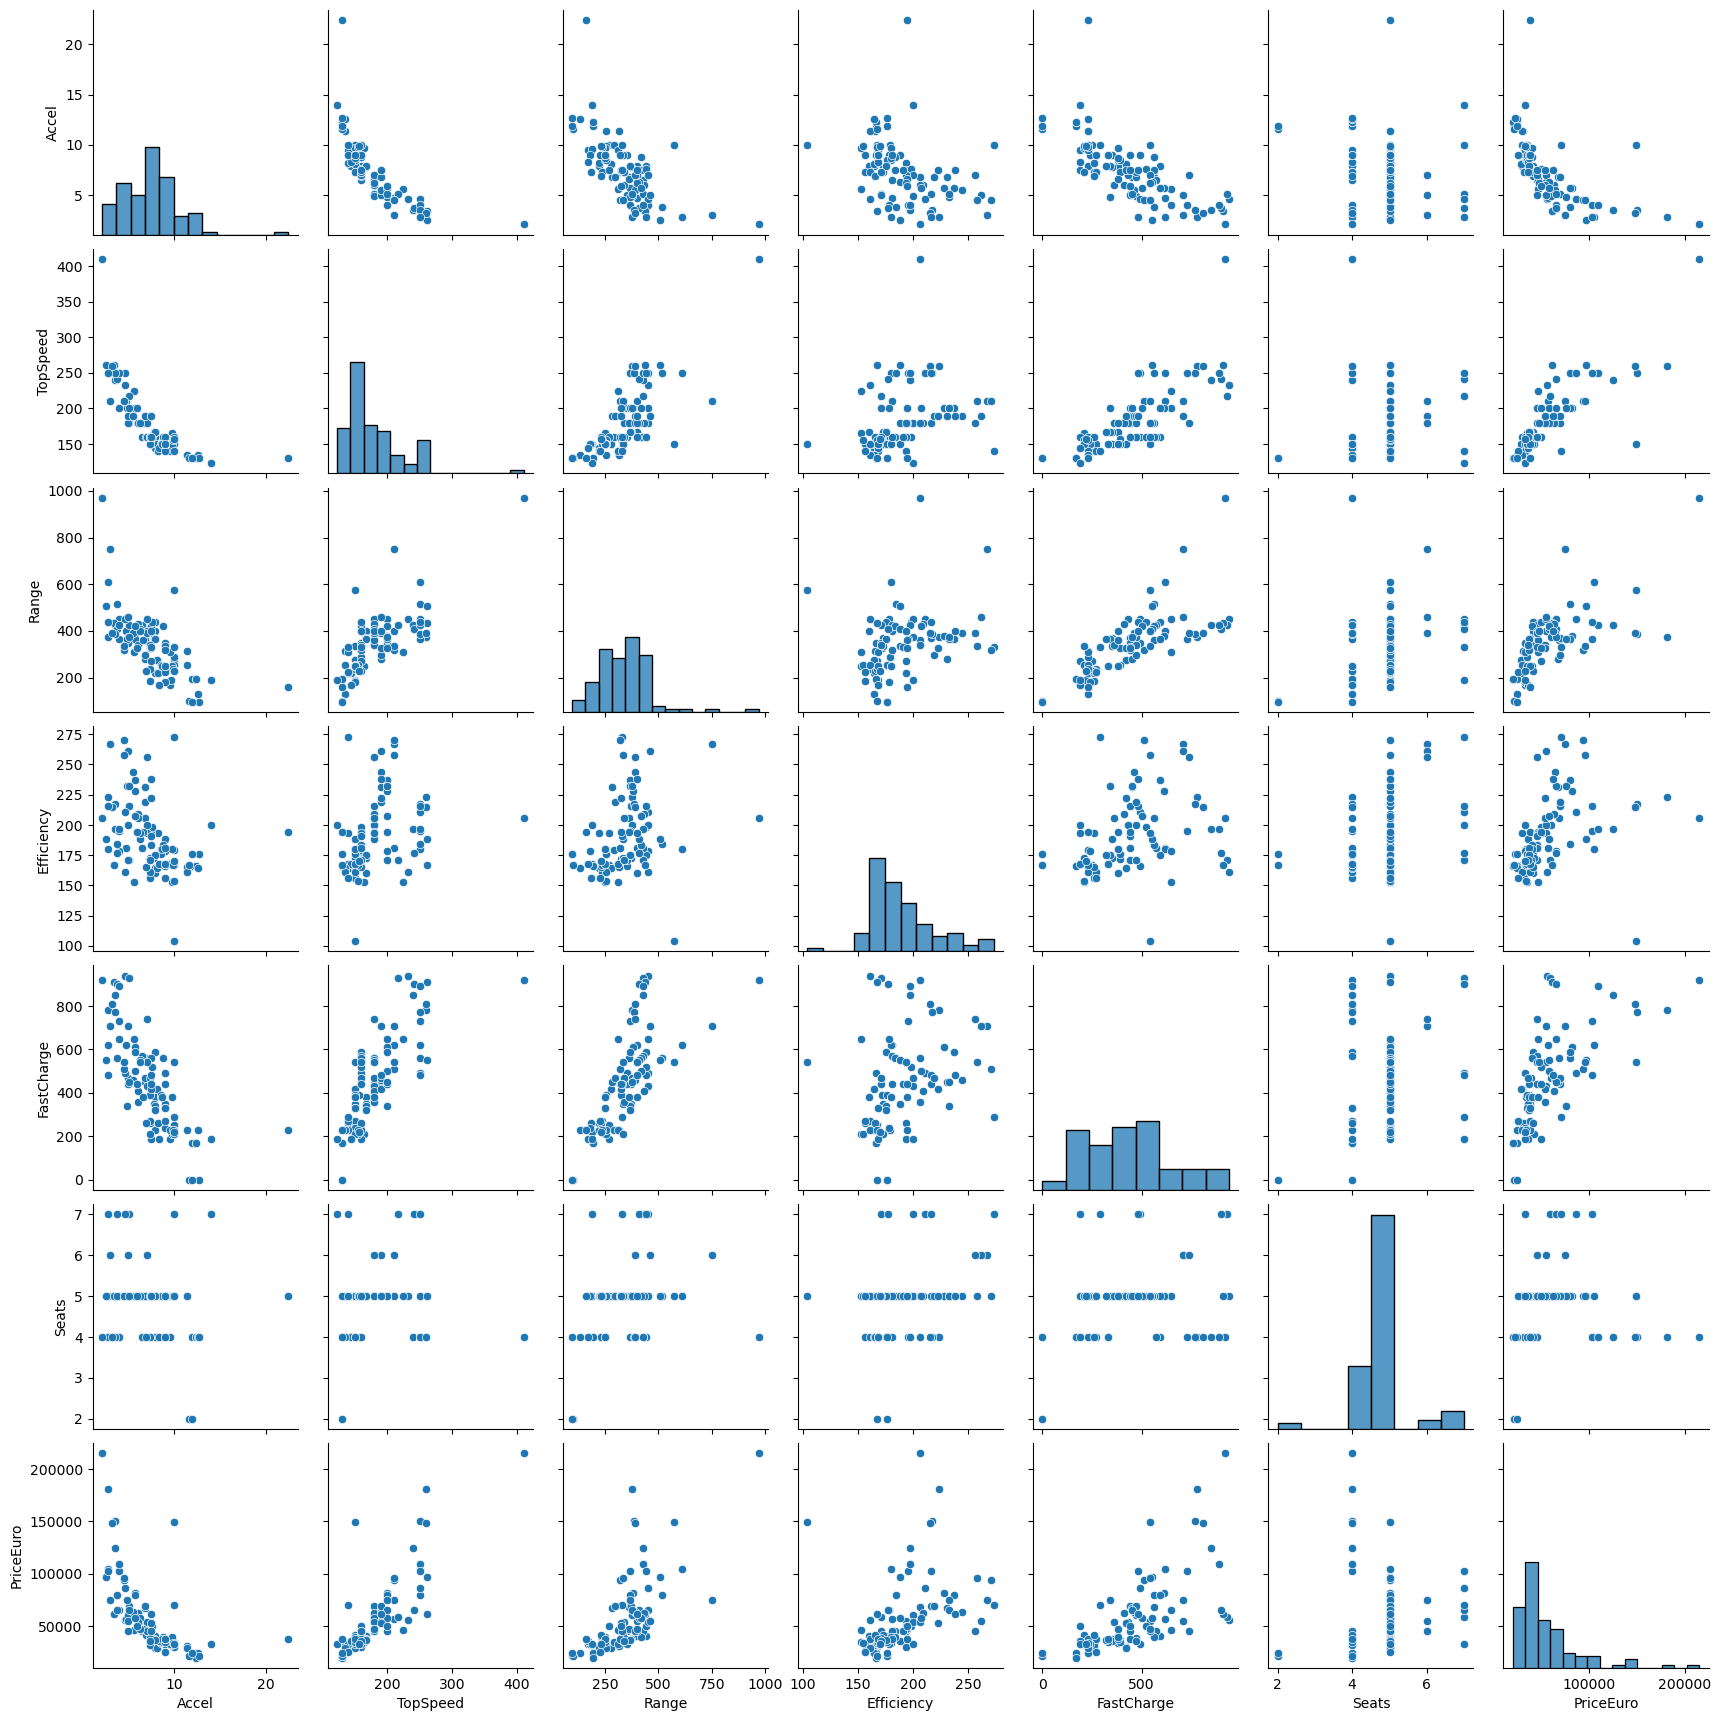

In [288]:
sns.pairplot(cars_df)
plt.show()

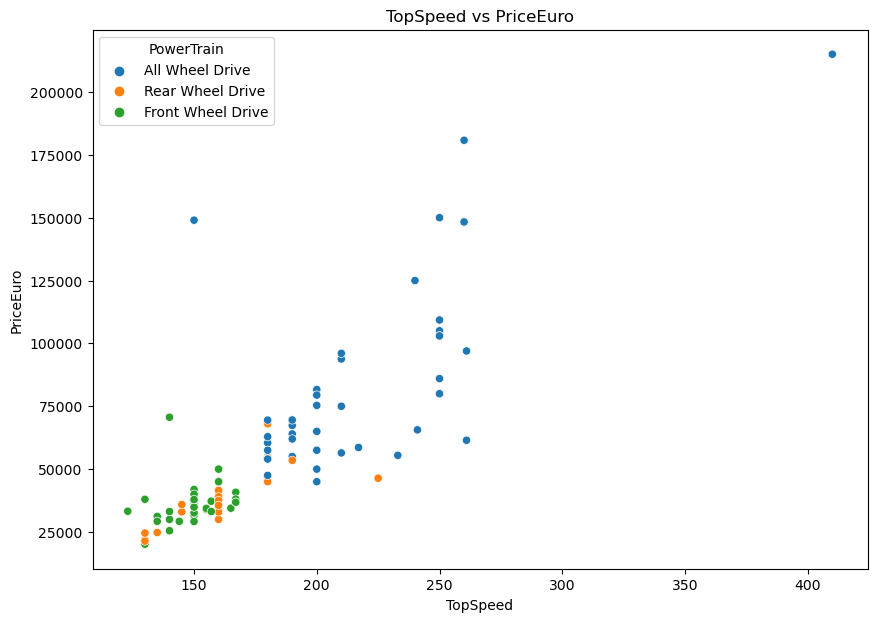

In [290]:
ax1 = sns.scatterplot(data=cars_df, x="TopSpeed", y="PriceEuro", hue = 'PowerTrain')
ax1.set(title = 'TopSpeed vs PriceEuro')
plt.show()

In [301]:
new_cars_df = cars_df.drop(columns=['Accel', 'Range', 'FastCharge'])
new_cars_df.head()

,Brand,TopSpeed,Efficiency,RapidCharge,PowerTrain,PlugType,BodyStyle,Segment,Seats,PriceEuro
0,Tesla,233,161,Rapid charging possible,All Wheel Drive,Type 2 CCS,Sedan,D,5,55480
1,Volkswagen,160,167,Rapid charging possible,Rear Wheel Drive,Type 2 CCS,Hatchback,C,5,30000
2,Polestar,210,181,Rapid charging possible,All Wheel Drive,Type 2 CCS,Liftback,D,5,56440
3,BMW,180,206,Rapid charging possible,Rear Wheel Drive,Type 2 CCS,SUV,D,5,68040
4,Honda,145,168,Rapid charging possible,Rear Wheel Drive,Type 2 CCS,Hatchback,B,4,32997


In [302]:
categorical = new_cars_df.select_dtypes('object')
categorical.head()

,Brand,RapidCharge,PowerTrain,PlugType,BodyStyle,Segment
0,Tesla,Rapid charging possible,All Wheel Drive,Type 2 CCS,Sedan,D
1,Volkswagen,Rapid charging possible,Rear Wheel Drive,Type 2 CCS,Hatchback,C
2,Polestar,Rapid charging possible,All Wheel Drive,Type 2 CCS,Liftback,D
3,BMW,Rapid charging possible,Rear Wheel Drive,Type 2 CCS,SUV,D
4,Honda,Rapid charging possible,Rear Wheel Drive,Type 2 CCS,Hatchback,B


In [303]:
dummy = pd.get_dummies(new_cars_df.select_dtypes(include='object'), drop_first=False)

In [304]:
new_cars_df = pd.concat([new_cars_df.select_dtypes(exclude='object'), dummy], axis=1)

In [305]:
new_cars_df.corr().style.background_gradient(cmap='coolwarm')

,TopSpeed,Efficiency,Seats,PriceEuro,Brand_Aiways,Brand_Audi,Brand_BMW,Brand_Byton,Brand_CUPRA,Brand_Citroen,Brand_DS,Brand_Fiat,Brand_Ford,Brand_Honda,Brand_Hyundai,Brand_Jaguar,Brand_Kia,Brand_Lexus,Brand_Lightyear,Brand_Lucid,Brand_MG,Brand_Mazda,Brand_Mercedes,Brand_Mini,Brand_Nissan,Brand_Opel,Brand_Peugeot,Brand_Polestar,Brand_Porsche,Brand_Renault,Brand_SEAT,Brand_Skoda,Brand_Smart,Brand_Sono,Brand_Tesla,Brand_Volkswagen,Brand_Volvo,RapidCharge_Rapid charging not possible,RapidCharge_Rapid charging possible,PowerTrain_All Wheel Drive,PowerTrain_Front Wheel Drive,PowerTrain_Rear Wheel Drive,PlugType_Type 1 CHAdeMO,PlugType_Type 2,PlugType_Type 2 CCS,PlugType_Type 2 CHAdeMO,BodyStyle_Cabrio,BodyStyle_Hatchback,BodyStyle_Liftback,BodyStyle_MPV,BodyStyle_Pickup,BodyStyle_SPV,BodyStyle_SUV,BodyStyle_Sedan,BodyStyle_Station,Segment_A,Segment_B,Segment_C,Segment_D,Segment_E,Segment_F,Segment_N,Segment_S
TopSpeed,1.000000,0.355675,0.126470,0.829057,-0.066665,0.148471,-0.031032,0.043164,-0.043830,-0.066665,-0.066665,-0.094744,0.003736,-0.110970,-0.067350,0.047510,-0.086443,-0.043830,-0.066665,0.161685,-0.089500,-0.066665,-0.023411,-0.066665,-0.074916,-0.116616,-0.094744,0.070345,0.389680,-0.230217,-0.112335,-0.119653,-0.196506,-0.089500,0.572067,-0.161918,0.001840,-0.251054,0.251054,0.707186,-0.525578,-0.219271,-0.128319,0.042224,0.053618,-0.101969,0.202943,-0.420071,0.145889,-0.066665,0.056479,-0.192511,-0.000333,0.481769,0.161685,-0.301909,-0.343784,-0.220692,0.215241,0.134655,0.537846,-0.097666,0.527045
Efficiency,0.355675,1.000000,0.301230,0.396705,-0.003921,0.372184,-0.079692,0.267856,-0.027477,-0.030842,-0.030842,-0.101225,0.089392,-0.101225,-0.197196,0.144149,-0.131774,0.012905,-0.286599,-0.030842,0.012905,-0.037573,0.181517,-0.111608,0.055083,-0.106933,-0.082094,-0.027477,0.155342,-0.144057,-0.077955,-0.056339,-0.095159,-0.111608,0.157841,-0.180390,0.036462,-0.105673,0.105673,0.486185,-0.346020,-0.167882,0.036462,-0.030948,0.053800,-0.075537,-0.034330,-0.375969,-0.208543,-0.054399,0.424835,0.195253,0.251850,-0.028587,0.093671,-0.187688,-0.362006,-0.179351,-0.035057,0.543141,0.058644,0.445197,0.056653
Seats,0.126470,0.301230,1.000000,0.020920,0.014566,0.002107,-0.097335,0.025480,-0.110459,0.014566,0.014566,-0.156984,0.029570,-0.156984,0.025480,0.014566,0.033229,0.014566,0.014566,0.014566,0.014566,0.014566,0.171283,-0.110459,0.134295,0.025480,0.020701,0.014566,-0.251983,-0.023814,-0.110459,-0.015753,-0.484829,0.014566,0.425060,-0.048915,0.014566,-0.423111,0.423111,0.194762,0.059042,-0.288441,0.264615,-0.128129,0.017920,0.025480,-0.339026,-0.325088,0.033229,0.014566,0.244184,0.317085,0.327305,-0.158787,-0.110459,-0.496077,-0.132715,0.040342,0.199753,0.048239,-0.023001,0.402968,-0.110459
PriceEuro,0.829057,0.396705,0.020920,1.000000,-0.057582,0.225745,-0.015775,0.020507,-0.031515,-0.046089,-0.053604,-0.080415,-0.007354,-0.088456,-0.098937,0.056955,-0.132654,-0.016940,0.271634,0.143379,-0.075238,-0.067525,0.030051,-0.070338,-0.084655,-0.104330,-0.098554,0.001832,0.548287,-0.163203,-0.104011,-0.128539,-0.169036,-0.088355,0.273680,-0.181188,0.013483,-0.197208,0.197208,0.670995,-0.450019,-0.262507,-0.065776,-0.005640,0.068079,-0.086621,0.187014,-0.413426,0.183291,-0.040533,0.012858,-0.043439,-0.047428,0.426250,0.274549,-0.263268,-0.322378,-0.275769,0.032529,0.178181,0.682892,-0.021956,0.464017
Brand_Aiways,-0.066665,-0.003921,0.014566,-0.057582,1.000000,-0.030638,-0.019903,-0.017150,-0.009804,-0.009804,-0.009804,-0.013933,-0.019903,-0.013933,-0.017150,-0.009804,-0.022365,-0.009804,-0.009804,-0.009804,-0.009804,-0.009804,-0.017150,-0.009804,-0.028733,-0.017150,-0.013933,-0.009804,-0.022365,-0.022365,-0.009804,-0.024626,-0.017150,-0.009804,-0.037631,-0.028733,-0.009804,-0.022365,0.022365,-0.080519,0.132242,-0.056056,-0.009804,-0.030638,0.037631,-0.017150,-0.017150,-0.066473,-0.022365,-0.009804,-0.017150,-0.017150,0.112411,-0.032468,-0.009804,-0.026737,-0.051602,0.154455,-0.040879,-0.032468,-0.035956,-0.024626,-0.009804
Brand_Audi,

In [319]:
model_df = new_cars_df[['TopSpeed', 'Brand_Porsche ', 'PriceEuro']]
model_df.head()

,TopSpeed,Brand_Porsche,PriceEuro
0,233,0,55480
1,160,0,30000
2,210,0,56440
3,180,0,68040
4,145,0,32997


In [325]:
train_df=model_df.sample(frac=0.7, random_state=99) #random state is a seed value
test_df=model_df.drop(train_df.index)

In [326]:
print(train_df.shape)
print(test_df.shape)

(72, 3)
(31, 3)


In [328]:
Y_train = train_df.PriceEuro
X_train = stats.add_constant(train_df.drop(columns=['PriceEuro']))

In [329]:
model_price = stats.OLS(Y_train, X_train)
results_price = model_price.fit()

In [330]:
print(results_price.summary())

                            OLS Regression Results                            
Dep. Variable:              PriceEuro   R-squared:                       0.866
Model:                            OLS   Adj. R-squared:                  0.862
Method:                 Least Squares   F-statistic:                     222.1
Date:                Sun, 09 Jul 2023   Prob (F-statistic):           8.61e-31
Time:                        13:26:31   Log-Likelihood:                -779.36
No. Observations:                  72   AIC:                             1565.
Df Residuals:                      69   BIC:                             1572.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const          -5.121e+04   6230.270     -8.

In [332]:
Y_test = test_df.PriceEuro
X_test = stats.add_constant(test_df.drop(columns=['PriceEuro']))

In [333]:
print(Y_test.shape)
print(X_test.shape)

(31,)
(31, 3)


In [335]:
test_predictions = results_price.predict(X_test)

In [342]:
train_rmse = stats.tools.eval_measures.rmse(Y_train, results_price.fittedvalues)
print('The training dataset root mean square error is {}'.format(train_rmse.round(1)))

The training dataset root mean square error is 12154.9


In [348]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error

In [351]:
gb_regressor = GradientBoostingRegressor()
gb_regressor.fit(X_train, Y_train)
Y_pred = gb_regressor.predict(X_test)

In [353]:
# Create and train the Gradient Boosting regressor
gb_regressor = GradientBoostingRegressor()
gb_regressor.fit(X_train, Y_train)

# Make predictions on the test set
Y_pred = gb_regressor.predict(X_test)

# Evaluate the model using mean squared error
rmse = np.sqrt(mean_squared_error(Y_test, Y_pred))
print('Root Mean Squared Error:', rmse)

Root Mean Squared Error: 29647.229654373612


In [356]:
import xgboost as xgb
model = xgb.XGBRegressor()
model.fit(X_train, Y_train)

Y_pred = model.predict(X_test)

rmse = np.sqrt(mean_squared_error(Y_test, Y_pred))
print('Root Mean Squared Error:', rmse)

Root Mean Squared Error: 26450.528947729672
